## Preprocessing

In [41]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [42]:
# Drop the non-beneficial ID columns, 'EIN'.

application_df = application_df.drop(columns = ['EIN'])
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


array([[<Axes: title={'center': 'STATUS'}>,
        <Axes: title={'center': 'ASK_AMT'}>],
       [<Axes: title={'center': 'IS_SUCCESSFUL'}>, <Axes: >]],
      dtype=object)

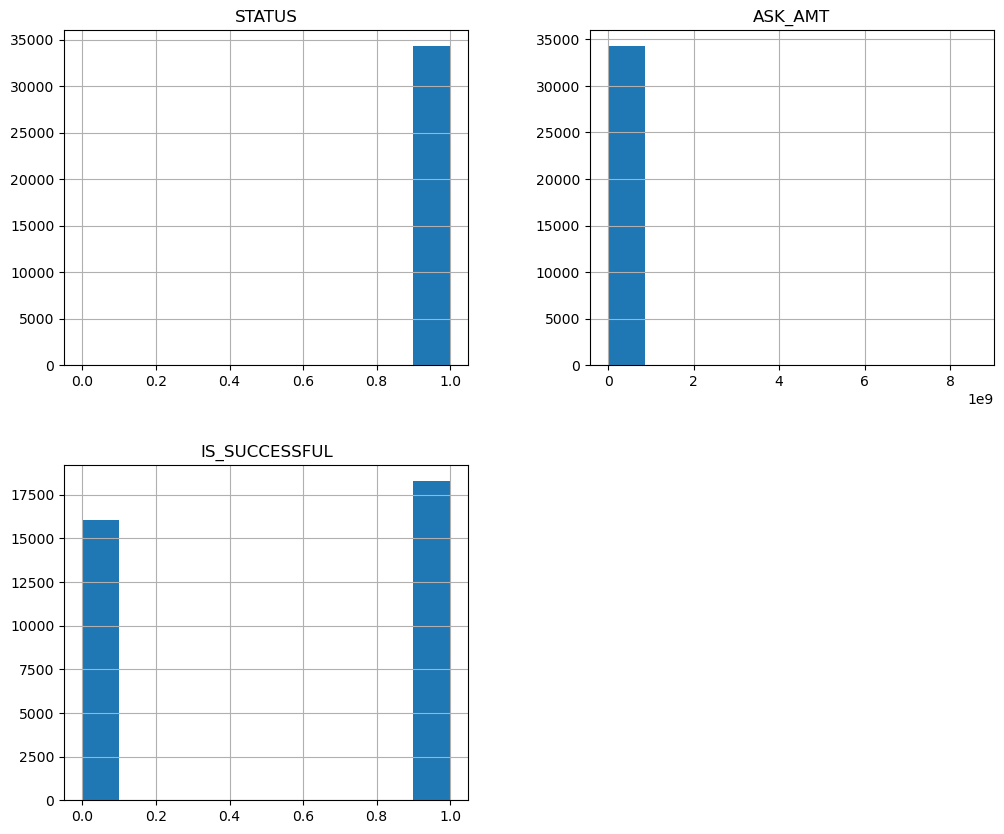

In [43]:
# Display histograms for the features in the DataFrame 'application_df'
application_df.hist(figsize=(12, 10))


In [45]:

# Calculate the number of unique values in each column of the DataFrame 'application_df'
unique_value_counts = application_df.nunique()
unique_value_counts


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [46]:
# Look at NAME value counts for binning
value_counts = application_df['NAME'].value_counts()
value_counts

NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

In [47]:

# Choose a cutoff value and create a list of names to be replaced
# use the variable name `name_to_replace`
name_to_replace = list(value_counts[value_counts<5].index)
name_to_replace

['AMALGAMATED TRANSIT UNION',
 '4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS',
 'TEXAS WATER UTILITIES ASSOCIATION',
 'PARENTS FAMILIES AND FRIENDS OF LESBIANS AND GAYS INC',
 'THE UNITED STATE PONY CLUBS INC',
 'WESTERN GOVERNORS UNIVERSITY',
 'AMERICAN ORFF-SCHULWERK ASSOCIATION',
 'GAMMA PHI BETA SORORITY INC',
 'AMATEUR ATHLETIC UNION OV THE UNITED STATES INC',
 'DEPARTMENT OF OKLAHOMA LADIES AUXILIARY TO THE VFW INC',
 'PILOT CLUB INTERNATIONAL',
 'DELTA CHI NATIONAL HOUSING CORPORATION',
 'SOROPTIMIST INTERNATIONAL TO THE AMERICAS INC',
 'WOODMEN OF THE WORLD LIFE INSURANCE SOCIETY',
 'COMMUNICATION ALLIANCE TO NETWORK THOROUGHBRED EX-RACEHORSES',
 'BLUE STAR MOTHERS OF AMERICA INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION',
 'YOUNG CATHOLIC PROFESSIONALS',
 'METHODIST RETIREMENT COMMUNITIES',
 'PTA NEW MEXICO CONGRESS',
 'UNITED MINE WORKERS OF AMERICA- INTERNATIONAL',
 'TEXAS EXTENSION EDUCATION ASSOCIATION',
 'VESTAVIA HILLS PARENT TEACHER ORGANIZATION INC',
 'INTERNATIONAL ASSOCIAT

In [50]:
# Replace specified values in the 'NAME' column with "Other"
for name in name_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name, "Other")

# Verify the success of the binning process
name_value_counts = application_df['NAME'].value_counts()
print(name_value_counts)


NAME
Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: count, Length: 403, dtype: int64


In [51]:
# Look at APPLICATION TYPE counts for binning
count_binning = application_df['APPLICATION_TYPE'].value_counts()
count_binning
     

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [52]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(count_binning[count_binning<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [53]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [54]:
# Look at CLASSIFICATION value counts for binning
count_binning = application_df['CLASSIFICATION'].value_counts()

In [55]:

# Display counts of 'CLASSIFICATION' values greater than 1 after binning
count_classification = count_binning[count_binning > 1]

# Show the results
print("Counts of 'CLASSIFICATION' Values with Occurrences > 1:")
print(count_classification)


Counts of 'CLASSIFICATION' Values with Occurrences > 1:
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [56]:

# Identify 'CLASSIFICATION' values with occurrences less than 100 for potential replacement
classifications_to_replace = list(count_binning[count_binning < 100].index)

# Display the list of 'CLASSIFICATION' values to be considered for replacement
print("Classifications to Replace:")
print(classifications_to_replace)

Classifications to Replace:
['C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150']


In [57]:
# Replace specified 'CLASSIFICATION' values with "Other" in the DataFrame
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Verify the success of the binning process
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
print("Counts of Values in 'CLASSIFICATION' Column After Binning:")
print(classification_value_counts)


Counts of Values in 'CLASSIFICATION' Column After Binning:
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64


In [58]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)


In [60]:

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
     


## Compile, Train and Evaluate the Model

In [61]:

# Define the deep neural network model with specified input features and hidden nodes for each layer
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 16

# Create a Sequential model
nn = tf.keras.models.Sequential()

# Add the first hidden layer with ReLU activation
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation='relu'))

# Add the second hidden layer with ReLU activation
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Display the model structure summary
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 1812      
                                                                 
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1861 (7.27 KB)
Trainable params: 1861 (7.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
     

In [63]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 0s 419us/step - loss: 0.5603 - accuracy: 0.7126 - val_loss: 0.4896 - val_accuracy: 0.7678
Epoch 2/100
684/684 [==============================] - 0s 349us/step - loss: 0.4787 - accuracy: 0.7597 - val_loss: 0.4620 - val_accuracy: 0.7774
Epoch 3/100
684/684 [==============================] - 0s 348us/step - loss: 0.4623 - accuracy: 0.7664 - val_loss: 0.4542 - val_accuracy: 0.7810
Epoch 4/100
684/684 [==============================] - 0s 348us/step - loss: 0.4570 - accuracy: 0.7721 - val_loss: 0.4527 - val_accuracy: 0.7839
Epoch 5/100
684/684 [==============================] - 0s 346us/step - loss: 0.4507 - accuracy: 0.7747 - val_loss: 0.4461 - val_accuracy: 0.7839
Epoch 6/100
684/684 [==============================] - 0s 369us/step - loss: 0.4450 - accuracy: 0.7773 - val_loss: 0.4458 - val_accuracy: 0.7870
Epoch 7/100
684/684 [==============================] - 0s 354us/step - loss: 0.4435 - accuracy: 0.7788 - val_loss: 0.4473 - val_ac

684/684 [==============================] - 0s 362us/step - loss: 0.4262 - accuracy: 0.7909 - val_loss: 0.4443 - val_accuracy: 0.7932
Epoch 58/100
684/684 [==============================] - 0s 359us/step - loss: 0.4262 - accuracy: 0.7896 - val_loss: 0.4444 - val_accuracy: 0.7945
Epoch 59/100
684/684 [==============================] - 0s 357us/step - loss: 0.4257 - accuracy: 0.7903 - val_loss: 0.4470 - val_accuracy: 0.7901
Epoch 60/100
684/684 [==============================] - 0s 355us/step - loss: 0.4258 - accuracy: 0.7900 - val_loss: 0.4464 - val_accuracy: 0.7906
Epoch 61/100
684/684 [==============================] - 0s 360us/step - loss: 0.4259 - accuracy: 0.7898 - val_loss: 0.4471 - val_accuracy: 0.7922
Epoch 62/100
684/684 [==============================] - 0s 359us/step - loss: 0.4258 - accuracy: 0.7887 - val_loss: 0.4464 - val_accuracy: 0.7930
Epoch 63/100
684/684 [==============================] - 0s 360us/step - loss: 0.4258 - accuracy: 0.7905 - val_loss: 0.4466 - val_accuracy

In [64]:

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4650 - accuracy: 0.7817 - 117ms/epoch - 438us/step
Loss: 0.4650433659553528, Accuracy: 0.7816909551620483


In [65]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

/Users/bani/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
